# Implementación de modelos ML
Esta implementación se basa en un dataset recortado del original. Tiene únicamente 502 filas y 11 columnas

In [ ]:
# Esto es simplemente una comprobación de como se comportan los modelos con unos datos similares pero más reducidos

### Librerías

In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Carga de datos

In [ ]:
df = pd.read_csv(r'C:\Users\nuria\OneDrive\Escritorio\ML_student_depression\data\processed\dataset_limpio_3_prueba.csv')
df.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,28,2.0,4.0,1,1,1,9,2,1,0
1,1,28,4.0,5.0,0,0,1,7,1,1,0
2,1,25,1.0,3.0,0,2,1,10,4,0,1
3,1,23,1.0,4.0,3,2,1,7,2,1,0
4,0,31,1.0,5.0,3,0,1,4,2,1,0


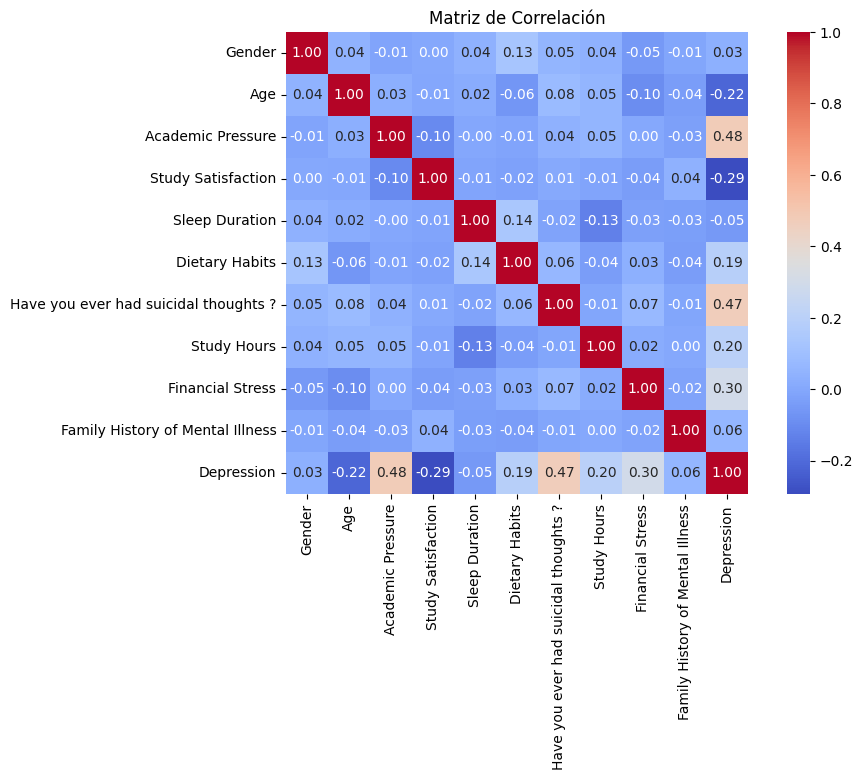

In [4]:
def graficar_relaciones(df):
    # Filtrar solo columnas numéricas
    num_cols = df.select_dtypes(include=['float64', 'int64']).columns

    # Matriz de correlación
    plt.figure(figsize=(10, 6))
    corr = df[num_cols].corr()
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
    plt.title('Matriz de Correlación')
    plt.show()

graficar_relaciones(df)

In [5]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=['Depression'])
y =df["Depression"]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [6]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from lightgbm import LGBMClassifier

In [7]:
model_list = [
    LogisticRegression(),
    DecisionTreeClassifier(ccp_alpha=0.001),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    AdaBoostClassifier(),
    SVC(),
    GaussianNB(),
    KNeighborsClassifier(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    LGBMClassifier(verbose=-1)
]

from sklearn.metrics import accuracy_score
results={}
for model in model_list:
    model.fit(x_train, y_train)
    
    y_pred = model.predict(x_test)
    
    accuracy = accuracy_score(y_test, y_pred)

    results[type(model).__name__] = accuracy

for model_name, accuracy in results.items():
    print(model_name , (accuracy*100))

LogisticRegression 96.02649006622516
DecisionTreeClassifier 85.43046357615894
RandomForestClassifier 95.36423841059603
GradientBoostingClassifier 96.02649006622516
AdaBoostClassifier 96.02649006622516
SVC 85.43046357615894
GaussianNB 96.68874172185431
KNeighborsClassifier 78.80794701986756
LinearDiscriminantAnalysis 95.36423841059603
QuadraticDiscriminantAnalysis 95.36423841059603
LGBMClassifier 94.70198675496688


In [8]:
max_classifier = max(results, key=results.get)
max_accuracy = results[max_classifier]

print("El clasificador con mayor accuracy es:", max_classifier ,"con un accuracy de:" ,max_accuracy)

El clasificador con mayor accuracy es: GaussianNB con un accuracy de: 0.9668874172185431


In [9]:
model=VotingClassifier(estimators=[
   ("logistic", LogisticRegression()),
    ("decision_tree", DecisionTreeClassifier(ccp_alpha=0.001)),
    ("random_forest", RandomForestClassifier()),
    ("gradient_boosting", GradientBoostingClassifier()),
    ("ada_boost", AdaBoostClassifier()),
    ("svc", SVC()),
    ("gaussian_nb", GaussianNB()),
    ("k_neighbors", KNeighborsClassifier()),
    ("lda", LinearDiscriminantAnalysis()),
    ("qda", QuadraticDiscriminantAnalysis()),
    ("lgbm", LGBMClassifier(verbose=-1))
])
model.fit(x_train,y_train)

VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('decision_tree',
                              DecisionTreeClassifier(ccp_alpha=0.001)),
                             ('random_forest', RandomForestClassifier()),
                             ('gradient_boosting',
                              GradientBoostingClassifier()),
                             ('ada_boost', AdaBoostClassifier()),
                             ('svc', SVC()), ('gaussian_nb', GaussianNB()),
                             ('k_neighbors', KNeighborsClassifier()),
                             ('lda', LinearDiscriminantAnalysis()),
                             ('qda', QuadraticDiscriminantAnalysis()),
                             ('lgbm', LGBMClassifier(verbose=-1))])

In [10]:
y_pred = model.predict(x_test)
    
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9735099337748344

### Conclusiones
Como se puede observar al implementar el mismo código y los mismos modelos con un conjunto de datos más reducido del original podemos conseguir predicciones mucho más altas y con menos rango de error.